### Exploring Customer Segmentation


<center>
    <img src = images/segments.jpeg>
</center>


In this activity, you are tasked with profiling customer groups for a large telecommunications company.  The data provided contains information on customers purchasing and useage behavior with the telecom products.  Your goal is to use PCA and clustering to segment these customers into meaningful groups, and report back your findings.  

Because these results need to be interpretable, it is important to keep the number of clusters reasonable.  Think about how you might represent some of the non-numeric features so that they can be included in your segmentation models.  You are to report back your approach and findings to the class.  Be specific about what features were used and how you interpret the resulting clusters.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN

In [3]:
df = pd.read_csv('data/telco_churn_data.csv')

In [4]:
df.tail()

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Latitude,Longitude,Population,Churn Value,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
7038,2569-WGERO,No,0,72,NaN,Yes,22.77,No,No,NaN,...,34.341737,-116.539416,2182,0,5306,NaN,NaN,0,0,NaN
7039,6840-RESVB,Yes,1,24,Offer C,Yes,36.05,Yes,Yes,DSL,...,34.667815,-117.536183,18980,0,2140,NaN,NaN,2,0,NaN
7040,2234-XADUH,Yes,4,72,NaN,Yes,29.66,Yes,Yes,Cable,...,34.559882,-115.637164,42,0,5560,NaN,NaN,2,0,4.0
7041,4801-JZAZL,Yes,1,11,NaN,No,0.00,No,Yes,DSL,...,34.167800,-116.864330,301,0,2793,NaN,NaN,0,0,NaN
7042,3186-AJIEK,No,0,66,NaN,Yes,30.96,No,Yes,Fiber Optic,...,34.424926,-117.184503,28819,0,5097,NaN,NaN,1,2,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Referred a Friend                  7043 non-null   object 
 2   Number of Referrals                7043 non-null   int64  
 3   Tenure in Months                   7043 non-null   int64  
 4   Offer                              3166 non-null   object 
 5   Phone Service                      7043 non-null   object 
 6   Avg Monthly Long Distance Charges  7043 non-null   float64
 7   Multiple Lines                     7043 non-null   object 
 8   Internet Service                   7043 non-null   object 
 9   Internet Type                      5517 non-null   object 
 10  Avg Monthly GB Download            7043 non-null   int64  
 11  Online Security                    7043 non-null   objec

In [6]:
df.describe()

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Churn Value,CLTV,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,1834.000000
mean,1.951867,32.386767,22.958954,21.110890,65.538800,2280.381264,1.962182,278.499225,749.099262,46.509726,0.468692,93486.070567,36.197455,-119.756684,22139.603294,0.265370,4400.295755,1.338776,0.308107,3.005453
std,3.001199,24.542061,15.448113,20.948471,30.606805,2266.220462,7.902614,685.039625,846.660055,16.750352,0.962802,1856.767505,2.468929,2.154425,21152.392837,0.441561,1183.057152,1.430471,0.717514,1.256938
min,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,19.000000,0.000000,90001.000000,32.555828,-124.301372,11.000000,0.000000,2003.000000,0.000000,0.000000,1.000000
25%,0.000000,9.000000,9.210000,3.000000,35.890000,400.150000,0.000000,0.000000,70.545000,32.000000,0.000000,92101.000000,33.990646,-121.788090,2344.000000,0.000000,3469.000000,0.000000,0.000000,2.000000
50%,0.000000,29.000000,22.890000,17.000000,71.968000,1394.550000,0.000000,0.000000,401.440000,46.000000,0.000000,93518.000000,36.205465,-119.595293,17554.000000,0.000000,4527.000000,1.000000,0.000000,3.000000
75%,3.000000,55.000000,36.395000,28.000000,90.650000,3786.600000,0.000000,182.620000,1191.100000,60.000000,0.000000,95329.000000,38.161321,-117.969795,36125.000000,1.000000,5380.500000,2.000000,0.000000,4.000000
max,11.000000,72.000000,49.990000,94.000000,123.084000,8684.800000,49.790000,6477.000000,3564.720000,80.000000,9.000000,96150.000000,41.962127,-114.192901,105285.000000,1.000000,6500.000000,9.000000,6.000000,5.000000


In [7]:
df.describe()


,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Churn Value,CLTV,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,1834.000000
mean,1.951867,32.386767,22.958954,21.110890,65.538800,2280.381264,1.962182,278.499225,749.099262,46.509726,0.468692,93486.070567,36.197455,-119.756684,22139.603294,0.265370,4400.295755,1.338776,0.308107,3.005453
std,3.001199,24.542061,15.448113,20.948471,30.606805,2266.220462,7.902614,685.039625,846.660055,16.750352,0.962802,1856.767505,2.468929,2.154425,21152.392837,0.441561,1183.057152,1.430471,0.717514,1.256938
min,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,19.000000,0.000000,90001.000000,32.555828,-124.301372,11.000000,0.000000,2003.000000,0.000000,0.000000,1.000000
25%,0.000000,9.000000,9.210000,3.000000,35.890000,400.150000,0.000000,0.000000,70.545000,32.000000,0.000000,92101.000000,33.990646,-121.788090,2344.000000,0.000000,3469.000000,0.000000,0.000000,2.000000
50%,0.000000,29.000000,22.890000,17.000000,71.968000,1394.550000,0.000000,0.000000,401.440000,46.000000,0.000000,93518.000000,36.205465,-119.595293,17554.000000,0.000000,4527.000000,1.000000,0.000000,3.000000
75%,3.000000,55.000000,36.395000,28.000000,90.650000,3786.600000,0.000000,182.620000,1191.100000,60.000000,0.000000,95329.000000,38.161321,-117.969795,36125.000000,1.000000,5380.500000,2.000000,0.000000,4.000000
max,11.000000,72.000000,49.990000,94.000000,123.084000,8684.800000,49.790000,6477.000000,3564.720000,80.000000,9.000000,96150.000000,41.962127,-114.192901,105285.000000,1.000000,6500.000000,9.000000,6.000000,5.000000


In [8]:
df = df.drop(columns = ['Customer ID','Latitude','Longitude']) #drop columns with unique ID for each row; latitude/longitude may not be relevant

In [9]:
df.head()

,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,...,City,Zip Code,Population,Churn Value,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
0,No,0,1,NaN,No,0.00,No,Yes,Fiber Optic,9,...,Los Angeles,90022,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,19,...,Los Angeles,90063,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,57,...,Los Angeles,90065,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,13,...,Inglewood,90303,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,15,...,Whittier,90602,26265,1,2793,Price,Extra data charges,1,0,2.0


In [10]:
df['Multiple Lines'] = df['Multiple Lines'].replace({'Yes': 1, 'No': 0})
df['Internet Service'] = df['Internet Service'].replace({'Yes': 1, 'No': 0})
df['Referred a Friend'] = df['Referred a Friend'].replace({'Yes': 1, 'No': 0})
#replace yes/no in these columns with 1 and 0

/var/folders/pp/nppvp0b553397d5c5glkf28c0000gn/T/ipykernel_44418/3048133694.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Multiple Lines'] = df['Multiple Lines'].replace({'Yes': 1, 'No': 0})
/var/folders/pp/nppvp0b553397d5c5glkf28c0000gn/T/ipykernel_44418/3048133694.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Internet Service'] = df['Internet Service'].replace({'Yes': 1, 'No': 0})
/var/folders/pp/nppvp0b553397d5c5glkf28c0000gn/T/ipykernel_44418/3048133694.py:3: FutureWarning: Downcasting behavior in `replace`

In [11]:
df.head()


,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,...,City,Zip Code,Population,Churn Value,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
0,0,0,1,NaN,No,0.00,0,1,Fiber Optic,9,...,Los Angeles,90022,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,1,1,8,Offer E,Yes,48.85,1,1,Cable,19,...,Los Angeles,90063,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,0,0,18,Offer D,Yes,11.33,1,1,Fiber Optic,57,...,Los Angeles,90065,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,1,1,25,Offer C,Yes,19.76,0,1,Fiber Optic,13,...,Inglewood,90303,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,1,1,37,Offer C,Yes,6.33,1,1,Cable,15,...,Whittier,90602,26265,1,2793,Price,Extra data charges,1,0,2.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 43 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Referred a Friend                  7043 non-null   int64  
 1   Number of Referrals                7043 non-null   int64  
 2   Tenure in Months                   7043 non-null   int64  
 3   Offer                              3166 non-null   object 
 4   Phone Service                      7043 non-null   object 
 5   Avg Monthly Long Distance Charges  7043 non-null   float64
 6   Multiple Lines                     7043 non-null   int64  
 7   Internet Service                   7043 non-null   int64  
 8   Internet Type                      5517 non-null   object 
 9   Avg Monthly GB Download            7043 non-null   int64  
 10  Online Security                    7043 non-null   object 
 11  Online Backup                      7043 non-null   objec

In [13]:
df = df.drop(columns = ['Customer Satisfaction','Churn Category','Churn Reason']) #drop columns with most null values

In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Referred a Friend                  7043 non-null   int64  
 1   Number of Referrals                7043 non-null   int64  
 2   Tenure in Months                   7043 non-null   int64  
 3   Offer                              3166 non-null   object 
 4   Phone Service                      7043 non-null   object 
 5   Avg Monthly Long Distance Charges  7043 non-null   float64
 6   Multiple Lines                     7043 non-null   int64  
 7   Internet Service                   7043 non-null   int64  
 8   Internet Type                      5517 non-null   object 
 9   Avg Monthly GB Download            7043 non-null   int64  
 10  Online Security                    7043 non-null   object 
 11  Online Backup                      7043 non-null   objec

In [15]:
df = df.drop(columns = ['Internet Type'])

In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Referred a Friend                  7043 non-null   int64  
 1   Number of Referrals                7043 non-null   int64  
 2   Tenure in Months                   7043 non-null   int64  
 3   Offer                              3166 non-null   object 
 4   Phone Service                      7043 non-null   object 
 5   Avg Monthly Long Distance Charges  7043 non-null   float64
 6   Multiple Lines                     7043 non-null   int64  
 7   Internet Service                   7043 non-null   int64  
 8   Avg Monthly GB Download            7043 non-null   int64  
 9   Online Security                    7043 non-null   object 
 10  Online Backup                      7043 non-null   object 
 11  Device Protection Plan             7043 non-null   objec

In [17]:
df = df.dropna() #drop columns with null values

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3166 entries, 1 to 7039
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Referred a Friend                  3166 non-null   int64  
 1   Number of Referrals                3166 non-null   int64  
 2   Tenure in Months                   3166 non-null   int64  
 3   Offer                              3166 non-null   object 
 4   Phone Service                      3166 non-null   object 
 5   Avg Monthly Long Distance Charges  3166 non-null   float64
 6   Multiple Lines                     3166 non-null   int64  
 7   Internet Service                   3166 non-null   int64  
 8   Avg Monthly GB Download            3166 non-null   int64  
 9   Online Security                    3166 non-null   object 
 10  Online Backup                      3166 non-null   object 
 11  Device Protection Plan             3166 non-null   object 
 1

In [19]:
df['Phone Service'].unique()

array(['Yes', 'No'], dtype=object)

In [20]:
#columns = df[['Phone Service','Multiple Lines','Internet Service','Online Security','Online Backup','Device Protection Plan','Contract']]
unique_values_per_column = {}
for col in df.columns:
    unique_values_per_column[col] = df[col].unique()
    print(f"Processing column: {col}", unique_values_per_column[col])

#Yes/no columns - Phone service, Online Security, Online Backup, Device Protection Plan, Premium Tech Support, Streaming TV, Streaming Movies, Streaming Music, Unlimited Data, Paperless Billing, Gender, Senior Citizen, Married, Dependents
#One hot encoding for columns with multiple options - Offer, Contract, Payment Method, City, Gender

Processing column: Referred a Friend [1 0]
Processing column: Number of Referrals [ 1  0  6  2  4  3  8  7  5 10  9 11]
Processing column: Tenure in Months [ 8 18 25 37 27  1 58 15  7 11  3 13 16 24  4 32 54  2 55  5 65 49 43 56
 68 22 19 10 12 23 17 66 69 39 31 33 14 30 38 35  9 51 53 50 26 29 46 41
  6 20 42 28 36 34 21 57 64 40 60 71 72 70 45 61 44 52 67 59 62 63 47 48]
Processing column: Offer ['Offer E' 'Offer D' 'Offer C' 'Offer B' 'Offer A']
Processing column: Phone Service ['Yes' 'No']
Processing column: Avg Monthly Long Distance Charges [48.85 11.33 19.76 ... 28.03 39.67 19.23]
Processing column: Multiple Lines [1 0]
Processing column: Internet Service [1 0]
Processing column: Avg Monthly GB Download [19 57 13 15 20 33 26 21 32 31 12 10 16  2 11  6 30 29 24 25  9  7 22 14
 28  4 23  8  3  0 17 18  5 27 52 78 53 58 45 65 76 90 64 84 46 56 80 94
 51 63 73 69 59 48 47 75 42 41 82 71 85]
Processing column: Online Security ['No' 'Yes']
Processing column: Online Backup ['Yes' 'No']


In [21]:
columns = df[['Phone Service', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Paperless Billing', 'Gender', 'Senior Citizen', 'Married', 'Dependents']]

for col in df.columns:
    df[col] = df[col].replace({'Yes': 1, 'No': 0})
    
df.head()


/var/folders/pp/nppvp0b553397d5c5glkf28c0000gn/T/ipykernel_44418/2236805056.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'Yes': 1, 'No': 0})


,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,...,Married,Dependents,Number of Dependents,City,Zip Code,Population,Churn Value,CLTV,Total Customer Svc Requests,Product/Service Issues Reported
1,1,1,8,Offer E,1,48.85,1,1,19,0,...,1,1,1,Los Angeles,90063,55668,1,5302,5,0
2,0,0,18,Offer D,1,11.33,1,1,57,0,...,0,1,3,Los Angeles,90065,47534,1,3179,1,0
3,1,1,25,Offer C,1,19.76,0,1,13,0,...,1,1,1,Inglewood,90303,27778,1,5337,1,1
4,1,1,37,Offer C,1,6.33,1,1,15,0,...,1,1,1,Whittier,90602,26265,1,2793,1,0
5,0,0,27,Offer C,1,3.33,1,1,20,0,...,0,1,1,Pico Rivera,90660,63288,1,4638,0,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3166 entries, 1 to 7039
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Referred a Friend                  3166 non-null   int64  
 1   Number of Referrals                3166 non-null   int64  
 2   Tenure in Months                   3166 non-null   int64  
 3   Offer                              3166 non-null   object 
 4   Phone Service                      3166 non-null   int64  
 5   Avg Monthly Long Distance Charges  3166 non-null   float64
 6   Multiple Lines                     3166 non-null   int64  
 7   Internet Service                   3166 non-null   int64  
 8   Avg Monthly GB Download            3166 non-null   int64  
 9   Online Security                    3166 non-null   int64  
 10  Online Backup                      3166 non-null   int64  
 11  Device Protection Plan             3166 non-null   int64  
 1

In [23]:
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})

/var/folders/pp/nppvp0b553397d5c5glkf28c0000gn/T/ipykernel_44418/2767774066.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3166 entries, 1 to 7039
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Referred a Friend                  3166 non-null   int64  
 1   Number of Referrals                3166 non-null   int64  
 2   Tenure in Months                   3166 non-null   int64  
 3   Offer                              3166 non-null   object 
 4   Phone Service                      3166 non-null   int64  
 5   Avg Monthly Long Distance Charges  3166 non-null   float64
 6   Multiple Lines                     3166 non-null   int64  
 7   Internet Service                   3166 non-null   int64  
 8   Avg Monthly GB Download            3166 non-null   int64  
 9   Online Security                    3166 non-null   int64  
 10  Online Backup                      3166 non-null   int64  
 11  Device Protection Plan             3166 non-null   int64  
 1

In [25]:
df_encoded = pd.get_dummies(df, columns=['Offer', 'Contract', 'Payment Method', 'City'], dtype=int)

print(df_encoded)
#one hot encoding of columns with more than 2 unique options

      Referred a Friend  Number of Referrals  Tenure in Months  Phone Service  \
1                     1                    1                 8              1   
2                     0                    0                18              1   
3                     1                    1                25              1   
4                     1                    1                37              1   
5                     0                    0                27              1   
...                 ...                  ...               ...            ...   
7026                  0                    0                51              1   
7027                  0                    0                39              1   
7030                  1                    2                44              1   
7034                  0                    0                 2              1   
7039                  1                    1                24              1   

      Avg Monthly Long Dist

In [26]:
df = df.drop(columns = 'City')

In [27]:
df_encoded = pd.get_dummies(df, columns=['Offer', 'Contract', 'Payment Method'], dtype=int)

print(df_encoded)

      Referred a Friend  Number of Referrals  Tenure in Months  Phone Service  \
1                     1                    1                 8              1   
2                     0                    0                18              1   
3                     1                    1                25              1   
4                     1                    1                37              1   
5                     0                    0                27              1   
...                 ...                  ...               ...            ...   
7026                  0                    0                51              1   
7027                  0                    0                39              1   
7030                  1                    2                44              1   
7034                  0                    0                 2              1   
7039                  1                    1                24              1   

      Avg Monthly Long Dist

In [28]:
df.describe()


,Referred a Friend,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,Online Backup,...,Senior Citizen,Married,Dependents,Number of Dependents,Zip Code,Population,Churn Value,CLTV,Total Customer Svc Requests,Product/Service Issues Reported
count,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,...,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000
mean,0.462413,2.003474,33.391661,0.905559,23.180575,0.442514,0.787429,21.653190,0.301642,0.358812,...,0.143083,0.488945,0.233102,0.474416,93444.845546,21964.156033,0.258370,4447.628238,1.355654,0.293746
std,0.498664,3.046608,25.095938,0.292487,15.550694,0.496763,0.409191,21.274949,0.459043,0.479728,...,0.350213,0.499957,0.422873,0.974141,1842.430748,21188.824576,0.437808,1179.927550,1.441600,0.694555
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,90001.000000,11.000000,0.000000,2003.000000,0.000000,0.000000
25%,0.000000,0.000000,9.000000,1.000000,9.330000,0.000000,1.000000,4.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,92082.250000,2231.750000,0.000000,3586.500000,0.000000,0.000000
50%,0.000000,0.000000,29.000000,1.000000,23.075000,0.000000,1.000000,18.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,93450.000000,17058.000000,0.000000,4583.500000,1.000000,0.000000
75%,1.000000,3.000000,58.000000,1.000000,36.757500,1.000000,1.000000,29.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,95254.000000,36143.000000,1.000000,5393.000000,2.000000,0.000000
max,1.000000,11.000000,72.000000,1.000000,49.980000,1.000000,1.000000,94.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,9.000000,96150.000000,105285.000000,1.000000,6499.000000,9.000000,6.000000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3166 entries, 1 to 7039
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Referred a Friend                  3166 non-null   int64  
 1   Number of Referrals                3166 non-null   int64  
 2   Tenure in Months                   3166 non-null   int64  
 3   Offer                              3166 non-null   object 
 4   Phone Service                      3166 non-null   int64  
 5   Avg Monthly Long Distance Charges  3166 non-null   float64
 6   Multiple Lines                     3166 non-null   int64  
 7   Internet Service                   3166 non-null   int64  
 8   Avg Monthly GB Download            3166 non-null   int64  
 9   Online Security                    3166 non-null   int64  
 10  Online Backup                      3166 non-null   int64  
 11  Device Protection Plan             3166 non-null   int64  
 1

In [32]:
df_encoded_scaled = (df_encoded - df_encoded.mean())/df_encoded.std() #scale dataframe

In [33]:
colnum = len(df_encoded.columns)

In [34]:
var_threshold = 0.9


In [35]:
from sklearn.decomposition import PCA
explained_variances = []
for r in range(1, colnum +1):
    pca = PCA(n_components=r, random_state=42)
    components = pca.fit_transform(df_encoded_scaled)
    # Calculate explained variance
    explained_variance = np.sum(pca.explained_variance_ratio_)
    explained_variances.append (explained_variance)

In [ ]:
#Plot Scree plot to extract number of dimensions needed

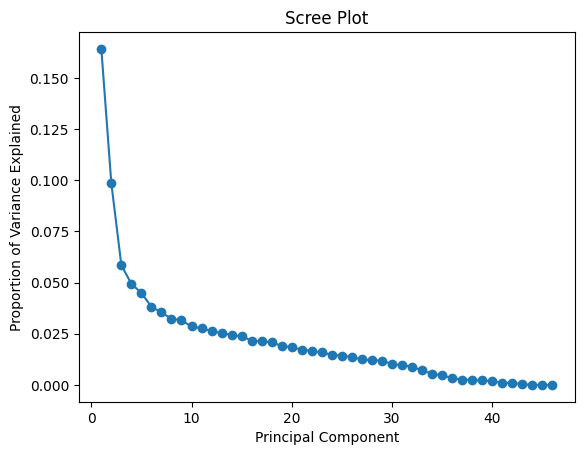

In [36]:
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [37]:
#From the  plot, the inflection is seen at 3, thereby choosing 3 for PCA plot. 

In [38]:
inertia_values = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto')
    kmeans.fit(df_encoded)
    inertia_values.append(kmeans.inertia_)


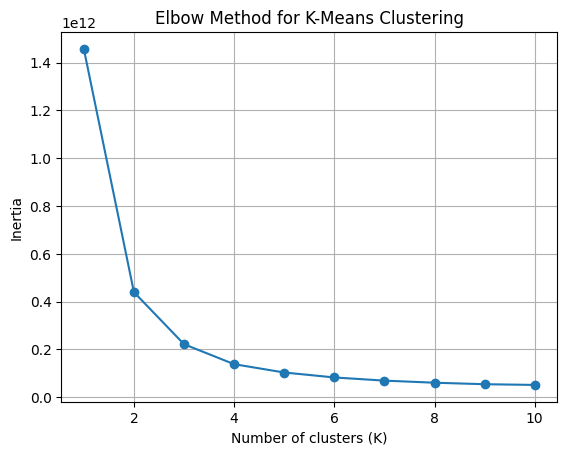

In [39]:
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method for K-Means Clustering')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

#From the  plot, the inflection is seen at 3, thereby choosing 3 for clustering

In [40]:
df_encoded


,Referred a Friend,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,Online Backup,...,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E,Contract_Month-to-Month,Contract_One Year,Contract_Two Year,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check
1,1,1,8,1,48.85,1,1,19,0,1,...,0,0,0,1,1,0,0,0,1,0
2,0,0,18,1,11.33,1,1,57,0,0,...,0,0,1,0,1,0,0,1,0,0
3,1,1,25,1,19.76,0,1,13,0,1,...,0,1,0,0,1,0,0,1,0,0
4,1,1,37,1,6.33,1,1,15,0,0,...,0,1,0,0,1,0,0,1,0,0
5,0,0,27,1,3.33,1,1,20,0,0,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7026,0,0,51,1,19.23,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
7027,0,0,39,1,1.57,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
7030,1,2,44,1,21.39,1,1,10,1,0,...,1,0,0,0,1,0,0,0,1,0
7034,0,0,2,1,6.85,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1


In [41]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
kmeans.fit(components)
inertia_values.append(kmeans.inertia_)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

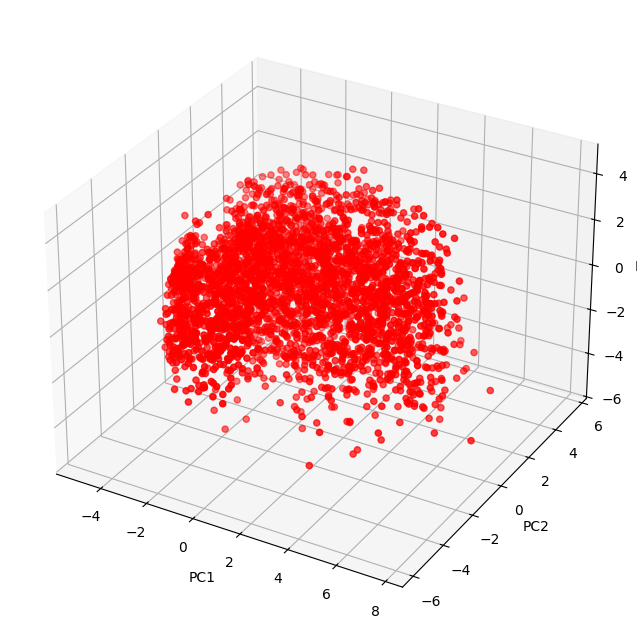

In [42]:
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(components[:, 0], components[:, 1], components[:, 2], c='r', marker='o')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()

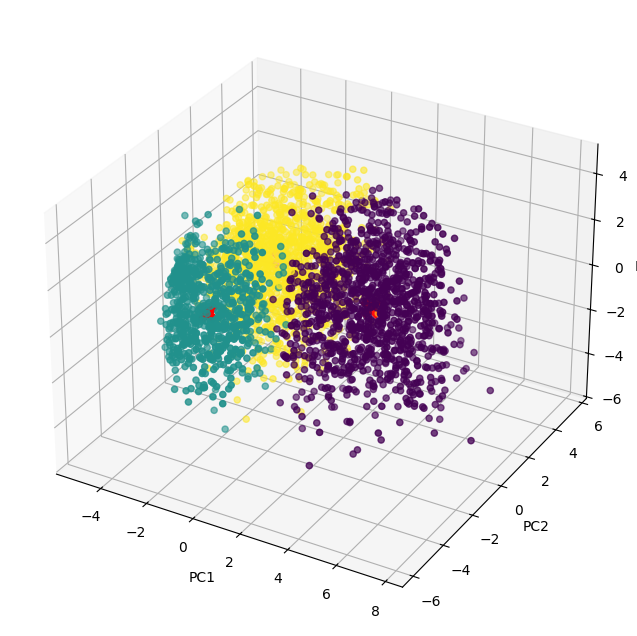

In [46]:
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(components[:, 0], components[:, 1], components[:, 2], c=labels, marker='o')
ax.scatter(centroids[:, 0], centroids[:, 1], marker='X', color='red', label='Centroids', s=200)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()

#PCA plot with data points colored by kmeans label and centroids plotted